<a href="https://colab.research.google.com/github/gayakwadmilind/ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
from scipy.stats import normaltest

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import os # accessing directory structure
import matplotlib.pyplot as mp

import seaborn as sb
# test classification dataset
from sklearn.datasets import make_classification

# test regression dataset
from sklearn.datasets import make_regression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# path copied = /content/drive/MyDrive/train.csv
training_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
testing_data = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
training_data.shape

(2000, 21)

In [ ]:
testing_data.shape

(1000, 21)

In [ ]:
training_data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [5]:
null_check = pd.isnull(training_data["clock_speed"])
null_team_data = training_data[null_check]

In [ ]:
missing_values_count = null_check.sum()
print("Count of missing values in the 'Team' column:", missing_values_count)

Count of missing values in the 'Team' column: 0


In [6]:
#missing values
print('#missing values')
print(training_data.isnull().sum())
#total missing values
print('total missing values')
print(training_data.isnull().sum().sum())
# missing values percentage
print('missing values percentage')
print(training_data.isnull().sum()*100/len(training_data))

#missing values
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
total missing values
0
missing values percentage
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64


Histogram of Price Range


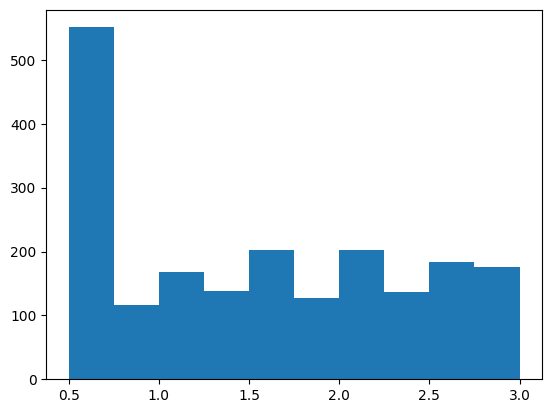

In [7]:
print ('Histogram of Price Range')
pyplot.hist(training_data['clock_speed'])
pyplot.show()

Histogram of Price Range


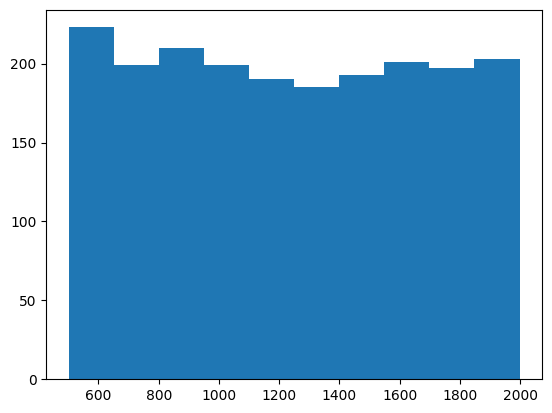

In [9]:
print ('Histogram of Price Range')
pyplot.hist(training_data['battery_power'])
pyplot.show()

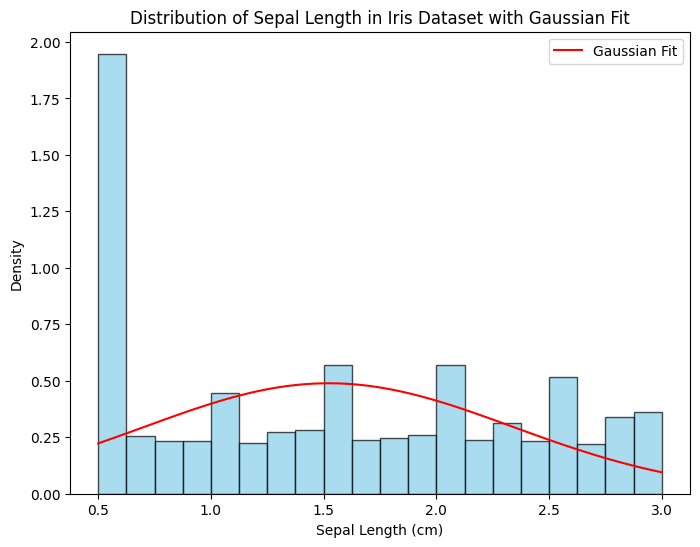

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
#iris = load_iris()
clock_speed = training_data['clock_speed'] # Extract sepal length (feature at index 0)

mu, std = np.mean(clock_speed), np.std(clock_speed)
x = np.linspace(np.min(clock_speed), np.max(clock_speed), 100)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std)**2)

plt.figure(figsize=(8, 6))
plt.hist(clock_speed, bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True)
plt.plot(x, y, color='red', label='Gaussian Fit')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.title('Distribution of Sepal Length in Iris Dataset with Gaussian Fit')
plt.legend()
plt.show()

In [ ]:
training_data.tail()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[5 rows x 21 columns]

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
training_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
training_data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
(training_data.isnull().sum()/(len(training_data)))*100

id               0.0
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64

In [ ]:
#Exploratory

In [ ]:
training_data.describe().T

count       mean          std    min      25%     50%  \
id             1000.0   500.5000   288.819436    1.0   250.75   500.5   
battery_power  1000.0  1248.5100   432.458227  500.0   895.00  1246.5   
blue           1000.0     0.5160     0.499994    0.0     0.00     1.0   
clock_speed    1000.0     1.5409     0.829268    0.5     0.70     1.5   
dual_sim       1000.0     0.5170     0.499961    0.0     0.00     1.0   
fc             1000.0     4.5930     4.463325    0.0     1.00     3.0   
four_g         1000.0     0.4870     0.500081    0.0     0.00     0.0   
int_memory     1000.0    33.6520    18.128694    2.0    18.00    34.5   
m_dep          1000.0     0.5175     0.280861    0.1     0.30     0.5   
mobile_wt      1000.0   139.5110    34.851550   80.0   109.75   139.0   
n_cores        1000.0     4.3280     2.288155    1.0     2.00     4.0   
pc             1000.0    10.0540     6.095099    0.0     5.00    10.0   
px_height      1000.0   627.1210   432.929699    0.0   263.75   564.5   
px_width       1000.0  1239.7740   439.670981  501.0   831.75  1250.0   
ram            1000.0  2138.9980  1088.092278  263.0  1237.25  2153.5   
sc_h           1000.0    11.9950     4.320607    5.0     8.00    12.0   
sc_w           1000.0     5.3160     4.240062    0.0     2.00     5.0   
talk_time      1000.0    11.0850     5.497636    2.0     6.75    11.0   
three_g        1000.0     0.7560     0.429708    0.0     1.00     1.0   
touch_screen   1000.0     0.5000     0.500250    0.0     0.00     0.5   
wifi           1000.0     0.5070     0.500201    0.0     0.00     1.0   

                   75%     max  
id              750.25  1000.0  
battery_power  1629.25  1999.0  
blue              1.00     1.0  
clock_speed       2.30     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       49.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           6.00     8.0  
pc               16.00    20.0  
px_height       903.00  1907.0  
px_width       1637.75  1998.0  
ram            3065.50  3989.0  
sc_h             16.00    19.0  
sc_w              8.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0

In [ ]:
training_data.describe(include='all').T

count       mean          std    min      25%     50%  \
id             1000.0   500.5000   288.819436    1.0   250.75   500.5   
battery_power  1000.0  1248.5100   432.458227  500.0   895.00  1246.5   
blue           1000.0     0.5160     0.499994    0.0     0.00     1.0   
clock_speed    1000.0     1.5409     0.829268    0.5     0.70     1.5   
dual_sim       1000.0     0.5170     0.499961    0.0     0.00     1.0   
fc             1000.0     4.5930     4.463325    0.0     1.00     3.0   
four_g         1000.0     0.4870     0.500081    0.0     0.00     0.0   
int_memory     1000.0    33.6520    18.128694    2.0    18.00    34.5   
m_dep          1000.0     0.5175     0.280861    0.1     0.30     0.5   
mobile_wt      1000.0   139.5110    34.851550   80.0   109.75   139.0   
n_cores        1000.0     4.3280     2.288155    1.0     2.00     4.0   
pc             1000.0    10.0540     6.095099    0.0     5.00    10.0   
px_height      1000.0   627.1210   432.929699    0.0   263.75   564.5   
px_width       1000.0  1239.7740   439.670981  501.0   831.75  1250.0   
ram            1000.0  2138.9980  1088.092278  263.0  1237.25  2153.5   
sc_h           1000.0    11.9950     4.320607    5.0     8.00    12.0   
sc_w           1000.0     5.3160     4.240062    0.0     2.00     5.0   
talk_time      1000.0    11.0850     5.497636    2.0     6.75    11.0   
three_g        1000.0     0.7560     0.429708    0.0     1.00     1.0   
touch_screen   1000.0     0.5000     0.500250    0.0     0.00     0.5   
wifi           1000.0     0.5070     0.500201    0.0     0.00     1.0   

                   75%     max  
id              750.25  1000.0  
battery_power  1629.25  1999.0  
blue              1.00     1.0  
clock_speed       2.30     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       49.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           6.00     8.0  
pc               16.00    20.0  
px_height       903.00  1907.0  
px_width       1637.75  1998.0  
ram            3065.50  3989.0  
sc_h             16.00    19.0  
sc_w              8.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0

In [ ]:
cat_cols=training_data.select_dtypes(include=['object']).columns
num_cols = training_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

NameError: name 'training_data' is not defined

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(training_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    training_data[col].hist(grid=False)
    plt.ylabel('light')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=training_data[col])
    plt.show()

NameError: name 'num_cols' is not defined

In [ ]:
# colors
facies_colors = ['xkcd:goldenrod', 'xkcd:orange','xkcd:sienna','xkcd:violet',
       'xkcd:olive','xkcd:turquoise', "xkcd:yellowgreen", 'xkcd:indigo', 'xkcd:blue']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh',
                 'MS',  'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
#establish facies label str
df.loc[:,'FaciesLabels'] = df.apply(lambda row: label_facies(row, facies_labels), axis=1)

NameError: ignored

In [ ]:
training_data.corr()

id  battery_power      blue  clock_speed  dual_sim  \
id             1.000000      -0.021511  0.000464     0.035917 -0.002721   
battery_power -0.021511       1.000000 -0.046610    -0.039075 -0.061171   
blue           0.000464      -0.046610  1.000000     0.034754 -0.011100   
clock_speed    0.035917      -0.039075  0.034754     1.000000 -0.012423   
dual_sim      -0.002721      -0.061171 -0.011100    -0.012423  1.000000   
fc             0.016934      -0.007846 -0.056063     0.010127  0.057606   
four_g         0.030921      -0.042520 -0.001169    -0.024665  0.024907   
int_memory    -0.014023       0.003751 -0.012416    -0.030487 -0.012158   
m_dep         -0.002794      -0.009065  0.018319     0.016995  0.021760   
mobile_wt     -0.007541      -0.047065  0.023513    -0.014107 -0.001734   
n_cores       -0.015935       0.025732  0.003283    -0.012247 -0.003129   
pc             0.001969       0.012847 -0.025247     0.047469  0.073936   
px_height     -0.025056       0.048647 -0.058810     0.017277  0.006842   
px_width      -0.012138       0.053365 -0.032054     0.070585  0.015610   
ram           -0.043442      -0.032366  0.057570    -0.000650  0.048171   
sc_h          -0.011972      -0.055665  0.012780    -0.039503  0.006295   
sc_w           0.002918      -0.023905  0.004223    -0.027138 -0.002064   
talk_time      0.030807       0.015546 -0.031995    -0.078797  0.004390   
three_g        0.049571       0.031514  0.013530    -0.021406  0.000690   
touch_screen   0.039768      -0.010138 -0.060031     0.061893  0.034020   
wifi          -0.036643      -0.000414  0.025568    -0.048593  0.031545   

                     fc    four_g  int_memory     m_dep  mobile_wt  ...  \
id             0.016934  0.030921   -0.014023 -0.002794  -0.007541  ...   
battery_power -0.007846 -0.042520    0.003751 -0.009065  -0.047065  ...   
blue          -0.056063 -0.001169   -0.012416  0.018319   0.023513  ...   
clock_speed    0.010127 -0.024665   -0.030487  0.016995  -0.014107  ...   
dual_sim       0.057606  0.024907   -0.012158  0.021760  -0.001734  ...   
fc             1.000000  0.032832   -0.006565  0.020859   0.018353  ...   
four_g         0.032832  1.000000   -0.037488  0.014806  -0.000509  ...   
int_memory    -0.006565 -0.037488    1.000000 -0.004386  -0.010447  ...   
m_dep          0.020859  0.014806   -0.004386  1.000000  -0.041994  ...   
mobile_wt      0.018353 -0.000509   -0.010447 -0.041994   1.000000  ...   
n_cores        0.020828  0.066716    0.021601  0.010062  -0.038908  ...   
pc             0.659338  0.037669    0.022682  0.012663   0.027343  ...   
px_height     -0.017982  0.033655   -0.009564  0.062559   0.011157  ...   
px_width       0.030550  0.036545   -0.003877  0.034861  -0.014577  ...   
ram           -0.051997  0.030821   -0.007107  0.018349   0.028786  ...   
sc_h           0.045158 -0.015087   -0.009249 -0.026160  -0.022053  ...   
sc_w           0.006115 -0.000893    0.024521 -0.023393   0.022148  ...   
talk_time     -0.051458  0.013692    0.023759  0.024124  -0.021704  ...   
three_g       -0.011121  0.553528   -0.015922 -0.029278   0.006262  ...   
touch_screen   0.015467 -0.010003    0.022186  0.040254   0.044525  ...   
wifi          -0.060373 -0.035652    0.011860 -0.039705   0.069762  ...   

                     pc  px_height  px_width       ram      sc_h      sc_w  \
id             0.001969  -0.025056 -0.012138 -0.043442 -0.011972  0.002918   
battery_power  0.012847   0.048647  0.053365 -0.032366 -0.055665 -0.023905   
blue          -0.025247  -0.058810 -0.032054  0.057570  0.012780  0.004223   
clock_speed    0.047469   0.017277  0.070585 -0.000650 -0.039503 -0.027138   
dual_sim       0.073936   0.006842  0.015610  0.048171  0.006295 -0.002064   
fc             0.659338  -0.017982  0.030550 -0.051997  0.045158  0.006115   
four_g         0.037669   0.033655  0.036545  0.030821 -0.015087 -0.000893   
int_memory     0.022682  -0.009564 -0.003877 -0.007107 -0.009249  0.024521   
m_dep          0.

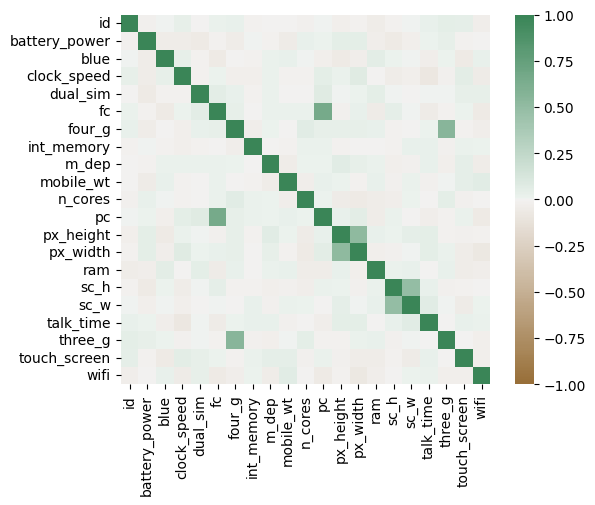

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

correlation_full_health = training_data.corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

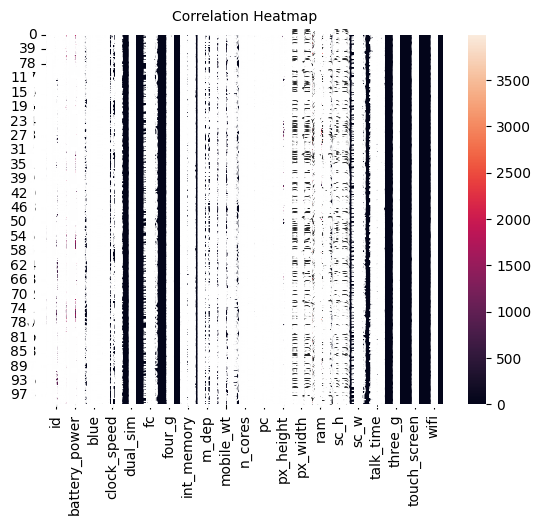

In [ ]:
heatmap = sns.heatmap(training_data, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=10)

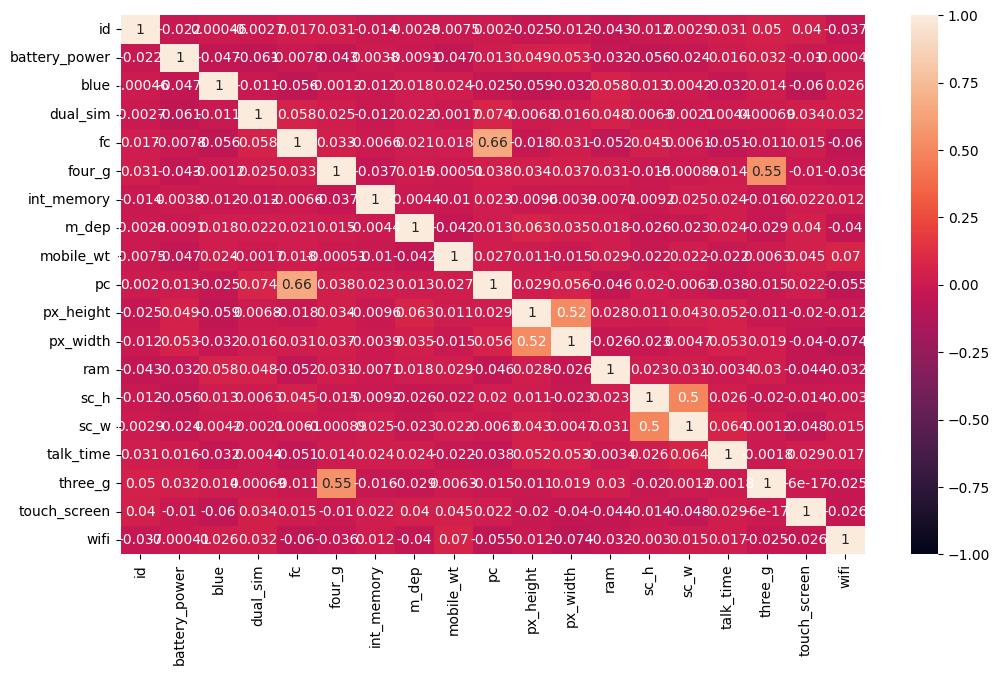

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(training_data.drop(['clock_speed','n_cores'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [ ]:

sns.distplot(training_data["Fish_Weight"], axlabel="Fish_Size");


NameError: name 'sns' is not defined

<Figure size 1300x1700 with 0 Axes>

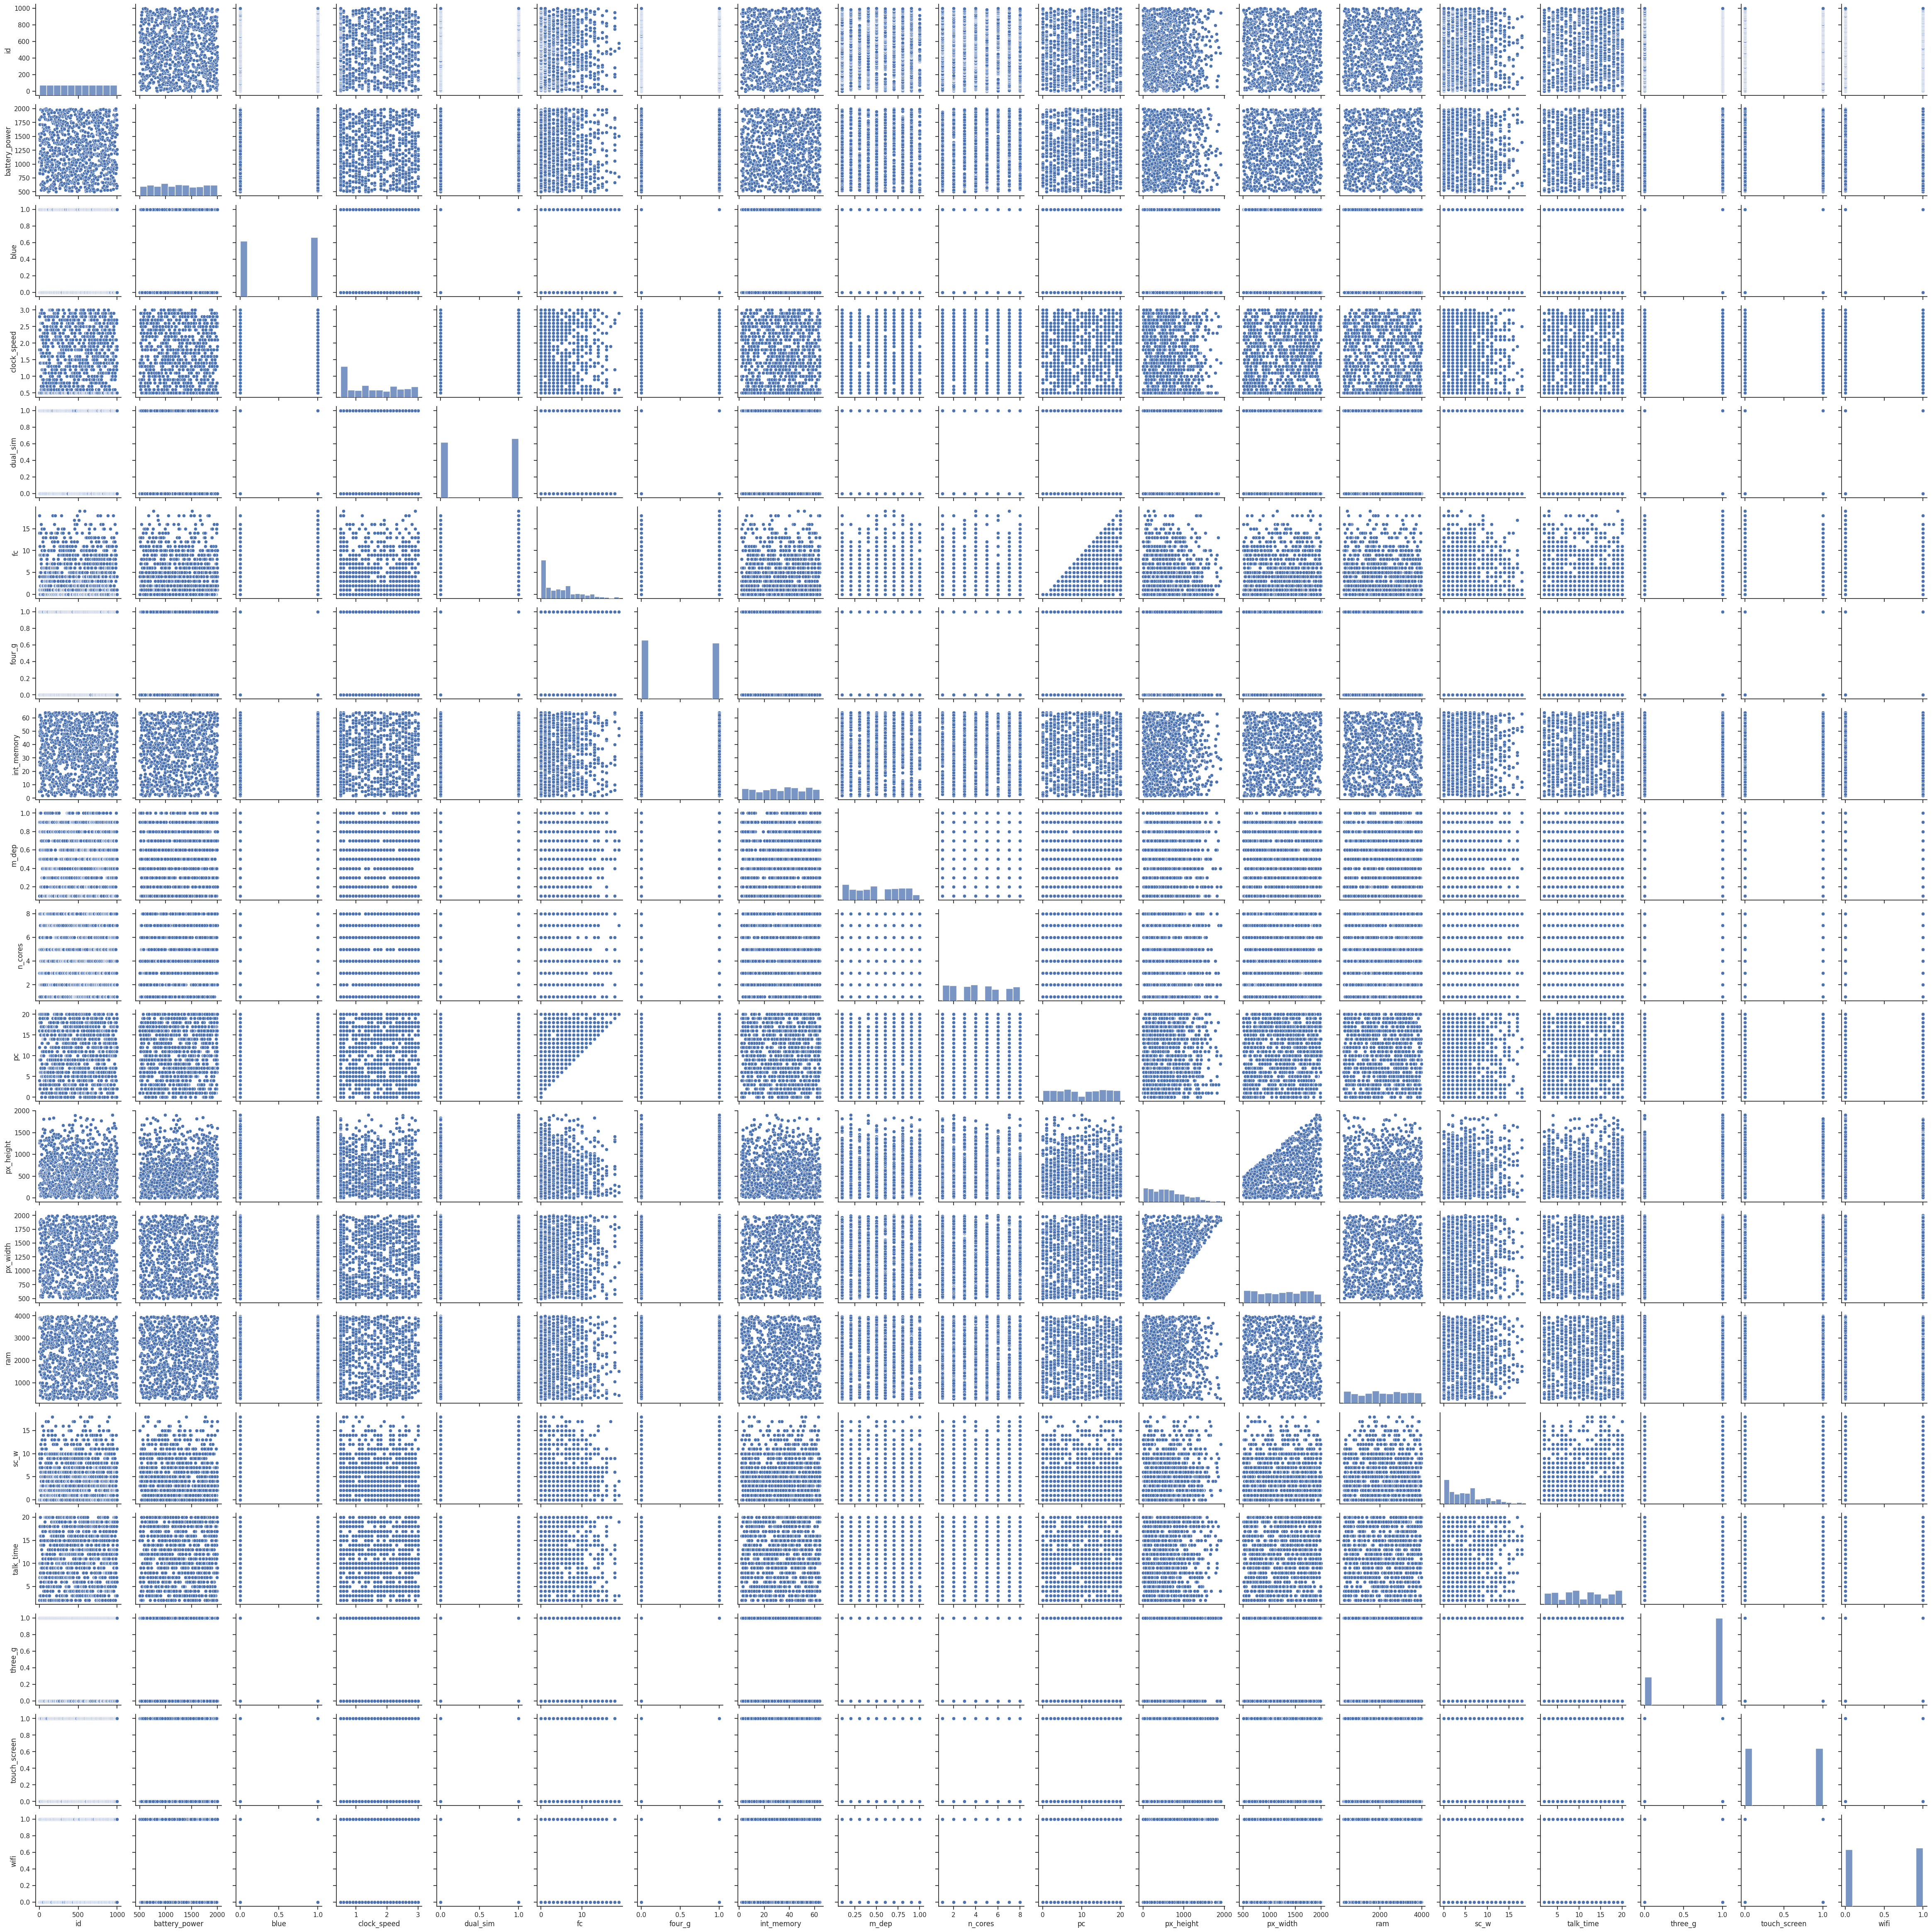

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=training_data.drop(['mobile_wt','sc_h'],axis=1))
plt.show()